In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Amazon Bestselling Books") \
    .getOrCreate()

df = spark.read.csv("bestsellers with categories.csv", header=True, inferSchema=True)

df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



In [3]:
print("Column names and data types:")
for col in df.dtypes:
    print(col)

Column names and data types:
('Name', 'string')
('Author', 'string')
('User Rating', 'double')
('Reviews', 'int')
('Price', 'int')
('Year', 'int')
('Genre', 'string')


In [5]:
print("First five rows:")
df.head(5)

First five rows:


[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')]

In [6]:
print("First row:")
print(df.first())

First row:
Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')


In [7]:
df.describe().show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                NULL|            NULL|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       NULL|
| stddev|                NULL|            NULL|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       NULL|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

In [8]:
print("Column names:")
print(df.columns)

Column names:
['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']


In [9]:
print("Total number of rows:", df.count())

Total number of rows: 550


In [23]:
df = df.toDF("name", "author", "user_rating", "reviews", "price", "year", "genre")


In [24]:
top_author = df.orderBy(df.user_rating.desc()).select("author").first()[0]
print("Author with the highest rating:", top_author)

Author with the highest rating: Bill Martin Jr.


In [25]:
bottom_author = df.orderBy(df.user_rating.asc()).select("author").first()[0]
print("Author with the lowest rating:", bottom_author)

Author with the lowest rating: J.K. Rowling


In [26]:
top_reviewed_author = df.orderBy(df.reviews.desc()).select("author").first()[0]
print("Author with the most reviews:", top_reviewed_author)

Author with the most reviews: Delia Owens


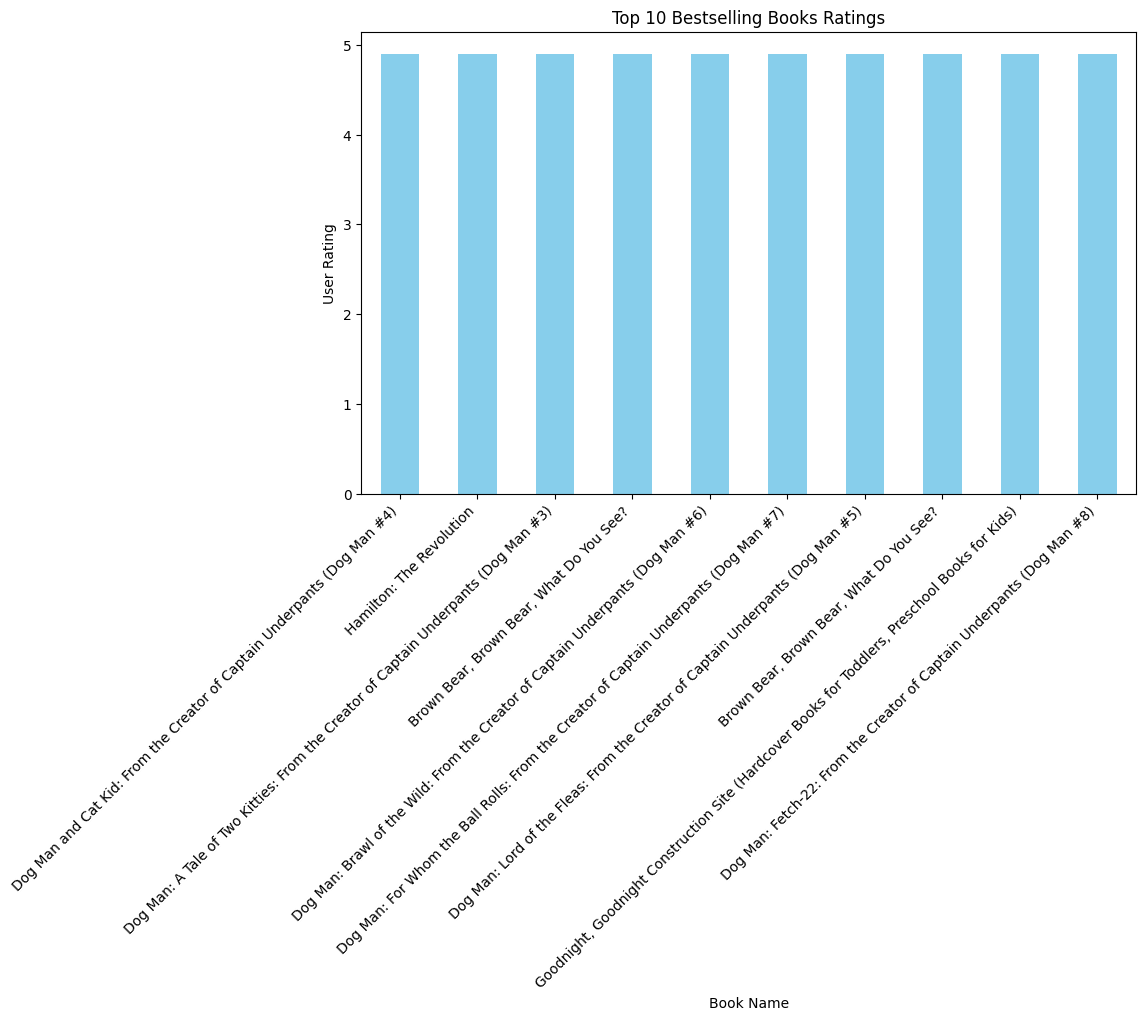

In [28]:
import matplotlib.pyplot as plt
top_books = df.orderBy(df.user_rating.desc()).limit(10)
top_books_pd = top_books.toPandas()
top_books_pd.plot(kind="bar", x="name", y="user_rating", figsize=(10, 6), legend=False, color='skyblue')
plt.title("Top 10 Bestselling Books Ratings")
plt.xlabel("Book Name")
plt.ylabel("User Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
correlation_matrix = df.select(['user_rating', 'reviews', 'price']).toPandas().corr()
print("Correlation matrix:")
print(correlation_matrix)

spark.stop()

Correlation matrix:
             user_rating   reviews     price
user_rating     1.000000 -0.001729 -0.133086
reviews        -0.001729  1.000000 -0.109182
price          -0.133086 -0.109182  1.000000
